In [12]:
import pandas as pd
import numpy
import matplotlib
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [13]:
df_train=pd.read_csv(r'C:\Users\DELL\Downloads\titanic.csv')
df_train.shape

(891, 12)

In [14]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
df_train.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [22]:
df_train=df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [23]:
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [26]:
def age_approx(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [27]:
df_train['Age']=df_train[['Age','Pclass']].apply(age_approx,axis=1)

In [28]:
df_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Survived    0
dtype: int64

In [30]:
df_train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Survived      int64
dtype: object

In [31]:
df_train_dummied=pd.get_dummies(df_train,columns=['Sex'])
df_train_dummied=pd.get_dummies(df_train_dummied,columns=['Embarked'])

In [32]:
df_train_dummied.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1


<AxesSubplot: >

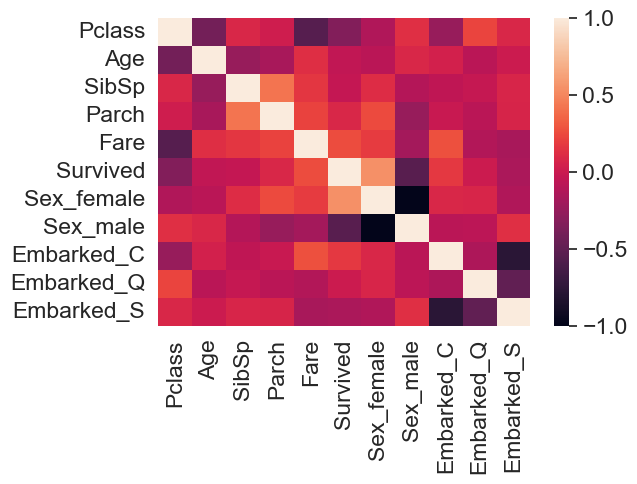

In [33]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [36]:
user_featurs=['Pclass','Age','SibSp','Parch','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']
X=df_train_dummied[user_featurs].values
y=df_train_dummied['Survived']

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)


(623, 9)
(268, 9)
(623,)
(623,)


In [45]:
LogReg=LogisticRegression()

In [46]:
LogReg.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred=LogReg.predict(X_test)

In [48]:
metrics.confusion_matrix(y_test,y_pred)

array([[132,  21],
       [ 36,  79]], dtype=int64)

In [49]:
metrics.accuracy_score(y_test,y_pred)

0.7873134328358209

In [50]:
len(X_test)

268

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       153
           1       0.79      0.69      0.73       115

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [58]:
LogReg.coef_

array([[-1.17966481, -0.04084854, -0.34991769,  0.06574985,  1.4992833 ,
        -1.29117591,  0.12158906, -0.03502442, -0.2757195 ]])

In [53]:
LogReg.intercept_

array([3.81412528])

In [56]:
df_train_dummied[user_featurs].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [57]:
LogReg.predict_proba(X_test)

array([[0.13041499, 0.86958501],
       [0.90654236, 0.09345764],
       [0.12090006, 0.87909994],
       [0.31885802, 0.68114198],
       [0.07419826, 0.92580174],
       [0.89562988, 0.10437012],
       [0.81329615, 0.18670385],
       [0.11121325, 0.88878675],
       [0.50720027, 0.49279973],
       [0.39912623, 0.60087377],
       [0.90994618, 0.09005382],
       [0.39254362, 0.60745638],
       [0.75735927, 0.24264073],
       [0.78528031, 0.21471969],
       [0.31885802, 0.68114198],
       [0.51903928, 0.48096072],
       [0.93204297, 0.06795703],
       [0.93226709, 0.06773291],
       [0.94060492, 0.05939508],
       [0.23229298, 0.76770702],
       [0.93079189, 0.06920811],
       [0.90940864, 0.09059136],
       [0.03643999, 0.96356001],
       [0.70001586, 0.29998414],
       [0.27812492, 0.72187508],
       [0.91642035, 0.08357965],
       [0.05576767, 0.94423233],
       [0.27633375, 0.72366625],
       [0.76389644, 0.23610356],
       [0.04929616, 0.95070384],
       [0.